# Penguins of Madagascar (Part 1)
<img src=".//images//penguins.jpg" width="400" height="300">


## From Dataset to project specific data base

We are planning to go to New York and would like to find Skipper, Private, Rico, and Kowalski! We don't know much about them, except their species: Adelie.

Adelie penguins live on the cost of Antartica and their conservation status is Near Threatened. We would like to find these 4 penguins and bring them home to reproduce!


In [25]:
import seaborn as sns
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt


In [26]:
# Load the penguins dataset
penguins = sns.load_dataset("penguins").dropna()
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


### Our model

We want to know with on-time prediction, if the penguin spotted in New York is Adelide or not. We gathered data, but we will use a special mobile app, which measures bills and flippers very accurately. Unfortunately, we cannot identify the gender!

Keep in mind that if this model is succesfull, we can make another project to use our data and identify penguins in Antartica using the same moble app. 

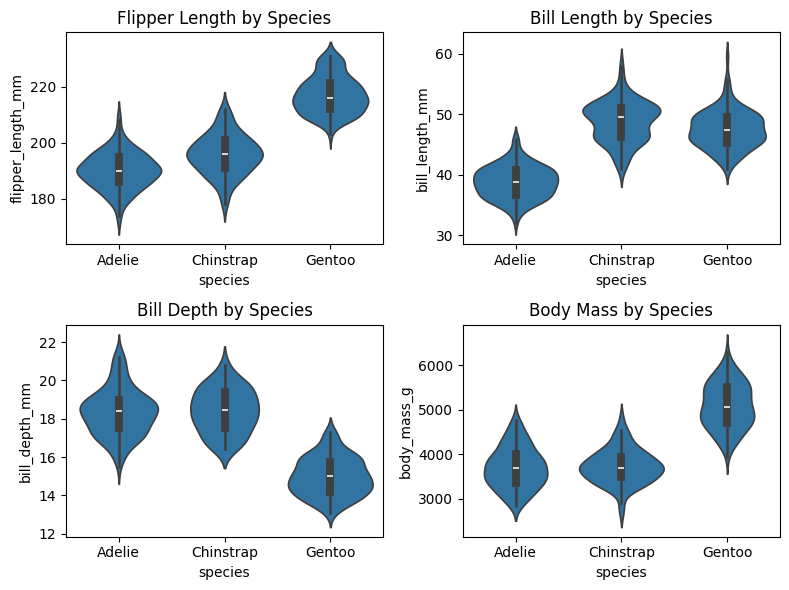

In [27]:
# Data visualisation

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Violin plot for flipper length
sns.violinplot(ax=axs[0, 0], x="species", y="flipper_length_mm", data=penguins)
axs[0, 0].set_title("Flipper Length by Species")

# Violin plot for bill length
sns.violinplot(ax=axs[0, 1], x="species", y="bill_length_mm", data=penguins)
axs[0, 1].set_title("Bill Length by Species")

# Violin plot for bill depth
sns.violinplot(ax=axs[1, 0], x="species", y="bill_depth_mm", data=penguins)
axs[1, 0].set_title("Bill Depth by Species")

# Violin plot for body mass
sns.violinplot(ax=axs[1, 1], x="species", y="body_mass_g", data=penguins)
axs[1, 1].set_title("Body Mass by Species")

plt.tight_layout()
plt.show()

### Exercise 1:

Write down the features you will use in the model. Provide explanation for each feature!


| Feature Name       | Include | Explanation (Why I would or wouldn't include it in the model            |
|--------------------|---------|-------------------------------------------------------------------------|
| species            |         |                                                                         |
| island             |         |                                                                         |
| bill_length_mm     |         |                                                                         |
| bill_depth_mm      |         |                                                                         |
| flipper_length_mm  |         |                                                                         |
| body_mass_g        |         |                                                                         |
| sex                |         |                                                                         |




| Feature Name       | Include | Explanation (Why I would or wouldn't include it in the model            |
|--------------------|---------|-------------------------------------------------------------------------|
| species            |   True  | We want to identify the Species. So it is our target feature            |
| island             |   False | We are in the middle of NY, so we don't know their origin               |
| bill_length_mm     |   True  | We have app that gives us this info                                     |
| bill_depth_mm      |   True  | We have app that gives us this info                                     |
| flipper_length_mm  |   True  | We have app that gives us this info                                     |
| body_mass_g        |   True  | We have app that gives us this info                                     |
| sex                |   False | I don't know PoM genders and I don't want to cross the line with penguins!                                                            |

### Data base design

We have to make the first idea about our DB. It can be modified later! Combining the knowledge from this course, we want to make as big as possible DB.

Lets do it together!


### Preparing data for building dataset

In [28]:
# Generate a DataFrame for unique islands 
# We want that unique ID starts with 100
islands = pd.DataFrame(penguins["island"].unique(), columns=["name"])
islands["island_id"] = range(100, len(islands) + 100)

In [29]:
# Merge the islands DataFrame with the penguins DataFrame to assign island IDs
df = penguins.merge(islands, left_on="island", right_on="name")

# Replace the island names with island IDs in the penguins DataFrame
df.drop(columns=["island", "name"], inplace=True)

In [30]:
# Add column animal_id, status_id
# animal_id should start with 1001 and go on
df["animal_id"] = range(1001, len(df) +1001)
df['status_id'] = np.nan  

# Create dataframe for saving the status of the datapoints
df_status = pd.DataFrame(columns=["status_id", "status_type"])

In [31]:
# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('db_penguins.db')
cursor = conn.cursor()

In [32]:
# Create the ISLANDS table
cursor.execute('''
CREATE TABLE IF NOT EXISTS ISLANDS (
    island_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL
)
''')

In [33]:
# Create the PENGUINS table with a foreign keys to ISLANDS, STATUS
cursor.execute('''
CREATE TABLE IF NOT EXISTS PENGUINS (
    animal_id INTEGER PRIMARY KEY AUTOINCREMENT,
    species TEXT,
    bill_length_mm REAL,
    bill_depth_mm REAL,
    flipper_length_mm REAL,
    body_mass_g REAL,
    sex TEXT,
    island_id INTEGER,
    status_id INTEGER,
    FOREIGN KEY (island_id) REFERENCES ISLANDS(island_id),
    FOREIGN KEY (status_id) REFERENCES STATUS(status_id)        
)
''')

In [34]:
# Create the MODEL table
cursor.execute('''
CREATE TABLE IF NOT EXISTS MODEL (
    model_id INTEGER PRIMARY KEY,
    model_version TEXT NOT NULL,
    model_method TEXT NOT NULL,           
    model_size INTEGER,
    model_scaled INTEGER,
    model_accuracy REAL,
    fv_train TEXT NOT NULL,
    fv_test TEXT NOT NULL         
)
''')

In [35]:
# Create the STATUS table
cursor.execute('''
CREATE TABLE IF NOT EXISTS STATUS (
    status_id INTEGER PRIMARY KEY,
    status_type TEXT NOT NULL
)
''')

In [36]:
# Insert data into ISLANDS table
islands[['island_id', 'name']].to_sql('ISLANDS', conn, if_exists='replace', index=False)

# Insert data into PENGUINS table
df.to_sql('PENGUINS', conn, if_exists='replace', index=False)

# Commit changes and close connection
conn.commit()
conn.close()

## Our Data base design

<img src="images\schema.svg" width="800" height="400">